<center><h1> Universitat Autònoma de Barcelona</h1></center>
<center> <h2> Aprenentatge Computacional </h2> </center>

<hr style="height:0.5px;border-width:0;color:black;background-color:gray">
<center><h3>Codi i Memòria de pràctiques.</h3></center>

<center> <h4> Cas Kaggle: European Soccer Database  </h4> </center>

<hr style="height:0.5px;border-width:10;color:black;background-color:gray">

<center> Curs 2022 - 2023 </center>
<center>  14 de Desembre de 2022 </center>

**Estudiant - NIU:**
    <p>Pol Colomer Campoy - 1605612</p>
<hr style="height:2px;border-width:10;color:black;background-color:black">

# Introducció:

Per a la realització d'aquesta pràctica, s'ens ha assignat un cas Kaggle amb la seva corresponent base de dades a cadascú. En el meu cas, se m'ha assignat una base de dades referent al futbol europeu entre les temporades del 2008 al 2016. Aquesta conté informació referent als partits, els jugadors, els lligues, els equips, etc.

In [1]:
# Imports
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns

# Variables utilitzades per mostrar per pantalla el text en colors (print)
# Extret d'una resposta de Stack Overflow: 
# https://stackoverflow.com/questions/287871/how-do-i-print-colored-text-to-the-terminal
# Resposta de 'qubodup' i editada per 'Peter Mortensen'
CRED = '\033[91m' #Color vermell
CGREEN = '\033[32m' #Color verd fosc subratllat
CGREENS = '\033[42m' #Color verd fosc subratllat
CBLUE = '\033[34m' #Color blau fluix subratllat
CBLUES = '\033[44m' #Color blau fluix subratllat
CORANGE = '\033[93m' #Color taronja (provar '93m' que és una mica més fosc o '33m' que és una mica més curt)
CEND = '\033[0m'
# Comprovació dels colors
print(CRED + "Color vermell!" + CEND)
print(CGREEN + "Color Verd fosc!" + CEND)
print(CGREENS + "Verd fosc subratllat!" + CEND)
print(CBLUE + "Color Blau fluix!" + CEND)
print(CBLUES + "Blau fluix subratllat!" + CEND)
print(CORANGE + "Color Taronja" + CEND)

# Visualitzarem només 3 decimals per mostra:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funció per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Funció per passar els atributs de tipus object a tipus int. Utilitzada majoritariament en l'apartat 1.2.
from sklearn import preprocessing
#sustituimos las columnas anteriores por ints gracias a sklearn
def categoricAInt(df):
    categorical_columns = df.select_dtypes(include=['object','bool']).columns
    for i in categorical_columns:
        en = preprocessing.LabelEncoder()
        df[i]= en.fit_transform(df[i])

# Línea de codi per augmentar el número de línies dels prints (útil per a poder veure tots els atributs amb NULL 
#en les següents taules)
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 200 # Per poder veure fins a 200 columnes. Útil per a visualitzar les taules .head(), p.e.

Color vermell!
Color Verd fosc!
Verd fosc subratllat!
Color Blau fluix!
Blau fluix subratllat!
Color Taronja


# 1. Anàlisi de la base de dades rebuda i tractament de dades:
Com es pot veure en els següents fragments de codi, la base de dades proporcionada no és un ``.csv``. En aquest cas es tracta d'una base de dades en format ``Sqlitle`` (sistema de gestió de Bases de Dades). Per tant, el primerament s'ha de tractar aquesta Base de Dades per tal de tractar les dades amb la llibreria ``Pandas`` de Python. Per a això he utilitzat ``DB Browser``, una eina que m'ha permès exportar les diferents taules de la Base de Dades en format ``.csv``. Com es podrà veure a continuació, aquesta Base de Dades consta de 8 taules diferents, de les quals mostraré a continuació informació bàsica d'elles com la dimensió de cada una, el número de valors NULL de cada atribut, mostrar les 5 primeres entrades per pantalla i en els casos d'atributs numèrics, descriure diferents valors esstadístics dels mateixos.

## 1.1. Anàlisi de la base de dades rebuda

### 1.1.1. Taula de Country

In [2]:
# Carreguem dataset d'exemple
datasetCountry = load_dataset('Data/Country.csv')
dataCountry = datasetCountry.values

print("Dimensionalitat de la BBDD Country:", datasetCountry.shape)


print(CBLUE + "\n Visualitzem el tipus de dades de la taula: " + CEND)
print(datasetCountry.dtypes)

print(CRED + "\n Observem el nombre de valors NO existents de cada atribut de la taula:" + CEND)
print(datasetCountry.isnull().sum())

print(CGREEN + "\n Visualitzem les primeres 5 mostres de la taula:" + CEND)
datasetCountry.head()

Dimensionalitat de la BBDD Country: (11, 2)

 Visualitzem el tipus de dades de la taula: 
id       int64
name    object
dtype: object

 Observem el nombre de valors NO existents de cada atribut de la taula:
id      0
name    0
dtype: int64

 Visualitzem les primeres 5 mostres de la taula:


id     name
0      1  Belgium
1   1729  England
2   4769   France
3   7809  Germany
4  10257    Italy

**Explicació dels atributs de la taula Country:**

| Nom de l'atribut | Descripció                                                   |
| :--------------: | :----------------------------------------------------------- |
|      **id**      | Id assignat a aquesta fila de la taula. Com que es tracta d'una taula de dos atributs, directament aquest id s'asòcia amb el valor del següent atribut. En aquest cas, name. Per tant, assignem al nom d'un país un id. |
|     **name**     | Atribut que conté una cadena de caràcters o string amb el nom del país. En el cas d'aquesta base de dades, són un total d'onze paisos europeus en els quals existeix una lliga de futbol en tots ells. |

Observem que es tracta d'una taula senzilla en la qual es relaciona el nom d'un país amb el seu corresponent id. Pot ser útil en un futur al intentar unificar totes les taules en una sola, tot i que encara no sé si tindrà gaire rellevància. Tot dependrà del que decideixi classificar o predir amb el model. Però primer visualitzaré les dades proporcionades i després decidiré què fer. 

### 1.1.2. Taula de League

In [3]:
# Carreguem dataset d'exemple
datasetLeague = load_dataset('Data/League.csv')
dataLeague = datasetLeague.values

#xLeague = dataCountry[:, :2]
#yLeague = dataCountry[:, 2]

print("Dimensionalitat de la BBDD League:", datasetLeague.shape)
#print("Dimensionalitat de les entrades X", xLeague.shape)
#print("Dimensionalitat de l'atribut Y", yLeague.shape)

print(CBLUE + "\n Visualitzem el tipus de dades de la taula: " + CEND)
print(datasetLeague.dtypes)


print("\n Observem el nombre de valors NO existents de cada atribut de la taula:")
print(datasetLeague.isnull().sum())

print(CGREEN + "\n Visualitzem les primeres 5 mostres de la taula:" + CEND)
datasetLeague.head()

Dimensionalitat de la BBDD League: (11, 3)

 Visualitzem el tipus de dades de la taula: 
id             int64
country_id     int64
name          object
dtype: object

 Observem el nombre de valors NO existents de cada atribut de la taula:
id            0
country_id    0
name          0
dtype: int64

 Visualitzem les primeres 5 mostres de la taula:


id  country_id                    name
0      1           1  Belgium Jupiler League
1   1729        1729  England Premier League
2   4769        4769          France Ligue 1
3   7809        7809   Germany 1. Bundesliga
4  10257       10257           Italy Serie A

**Explicació dels atributs de la taula League:**

| Nom de l'atribut | Descripció                                                   |
| :--------------: | :----------------------------------------------------------- |
|      **id**      | Id assignat a aquesta fila de la taula. Id associat al nom d'una lliga en concret. |
|  **country_id**  | Atribut que conté el id del país corresponent  de la taula anterior, és a dir, la taula *Country*. |
|     **name**     | Conté un string amb el nom corresponent d'una lliga de futbol relacionada amb el país que representa l'atribut *country_id* d'aquella fila. |

### 1.1.3. Taula de Match

In [4]:
# Carreguem dataset d'exemple
datasetMatch = load_dataset('Data/Match.csv')
dataMatch = datasetMatch.values

#xMatch = dataMatch[:, :2]
#yMatch = dataMatch[:, 2]

print("Dimensionalitat de la BBDD Match:", datasetMatch.shape)
print("Dimensionalitat de la BBDD Match Values:", datasetMatch.values.shape)
#print("Dimensionalitat de les entrades X", xMatch.shape)
#print("Dimensionalitat de l'atribut Y", yMatch.shape)

Dimensionalitat de la BBDD Match: (25979, 115)
Dimensionalitat de la BBDD Match Values: (25979, 115)


In [5]:
print(CBLUE + "\n Visualitzem el tipus de dades de la taula: " + CEND)
print(datasetMatch.dtypes)


 Visualitzem el tipus de dades de la taula: 
id                    int64
country_id            int64
league_id             int64
season               object
stage                 int64
date                 object
match_api_id          int64
home_team_api_id      int64
away_team_api_id      int64
home_team_goal        int64
away_team_goal        int64
home_player_X1      float64
home_player_X2      float64
home_player_X3      float64
home_player_X4      float64
home_player_X5      float64
home_player_X6      float64
home_player_X7      float64
home_player_X8      float64
home_player_X9      float64
home_player_X10     float64
home_player_X11     float64
away_player_X1      float64
away_player_X2      float64
away_player_X3      float64
away_player_X4      float64
away_player_X5      float64
away_player_X6      float64
away_player_X7      float64
away_player_X8      float64
away_player_X9      float64
away_player_X10     float64
away_player_X11     float64
home_player_Y1      float64
ho

In [6]:
print(CRED + "\n Observem el nombre de valors NO existents de cada atribut de la taula:" + CEND)
print(datasetMatch.isnull().sum())


 Observem el nombre de valors NO existents de cada atribut de la taula:
id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
away_player_X9       1833
away_player_X10      1833
away_player_X11      1839
home_player_Y1       1821
home_player_Y2       1821
home_player_Y3   

In [7]:
print(CGREEN + "\n Visualitzem les primeres 5 mostres de la taula:" + CEND)
datasetMatch.head()


 Visualitzem les primeres 5 mostres de la taula:


id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   
2   3           1          1  2008/2009      1  2008-08-16 00:00:00   
3   4           1          1  2008/2009      1  2008-08-17 00:00:00   
4   5           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  \
0        492473              9987              9993               1   
1        492474             10000              9994               0   
2        492475              9984              8635               0   
3        492476              9991              9998               5   
4        492477              7947              9985               1   

   away_team_goal  home_player_X1  home_player_X2  home_player_X3  \
0               1             NaN             NaN             NaN   
1               0             NaN             NaN             NaN   
2               3             NaN             NaN             NaN   
3               0             NaN             NaN             NaN   
4               3             NaN             NaN             NaN   

   home_player_X4  home_player_X5  home_player_X6  home_player_X7  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   home_player_X8  home_player_X9  home_player_X10  home_player_X11  \
0             NaN             NaN              NaN              NaN   
1             NaN             NaN              NaN              NaN   
2             NaN             NaN              NaN              NaN   
3             NaN             NaN              NaN              NaN   
4             NaN             NaN              NaN              NaN   

   away_player_X1  away_player_X2  away_player_X3  away_player_X4  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   away_player_X5  away_player_X6  away_player_X7  away_player_X8  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   away_player_X9  away_player_X10  away_player_X11  home_player_Y1  \
0             NaN              NaN              NaN             NaN   
1             NaN              NaN              NaN             NaN   
2             NaN              NaN              NaN             NaN   
3             NaN              NaN              NaN             NaN   
4             NaN              NaN              NaN             NaN   

   home_player_Y2  home_player_Y3  home_player_Y4  home_player_Y5  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   home_player_Y6  home_player_Y7  home_player_Y8  home_player_Y9  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2            

In [8]:
print(CORANGE + "Per veure estadístiques dels atributs numèrics de la taula:" + CEND)
datasetMatch.describe()

Per veure estadístiques dels atributs numèrics de la taula:


id  country_id  league_id     stage  match_api_id  \
count 25979.000   25979.000  25979.000 25979.000     25979.000   
mean  12990.000   11738.630  11738.630    18.243   1195429.160   
std    7499.636    7553.937   7553.937    10.407    494627.857   
min       1.000       1.000      1.000     1.000    483129.000   
25%    6495.500    4769.000   4769.000     9.000    768436.500   
50%   12990.000   10257.000  10257.000    18.000   1147511.000   
75%   19484.500   17642.000  17642.000    27.000   1709852.500   
max   25979.000   24558.000  24558.000    38.000   2216672.000   

       home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  \
count         25979.000         25979.000       25979.000       25979.000   
mean           9984.372          9984.475           1.545           1.161   
std           14087.454         14087.445           1.297           1.142   
min            1601.000          1601.000           0.000           0.000   
25%            8475.000          8475.000           1.000           0.000   
50%            8697.000          8697.000           1.000           1.000   
75%            9925.000          9925.000           2.000           2.000   
max          274581.000        274581.000          10.000           9.000   

       home_player_X1  home_player_X2  home_player_X3  home_player_X4  \
count       24158.000       24158.000       24147.000       24147.000   
mean            1.000           2.074           4.061           6.049   
std             0.022           0.387           0.386           0.446   
min             0.000           0.000           1.000           2.000   
25%             1.000           2.000           4.000           6.000   
50%             1.000           2.000           4.000           6.000   
75%             1.000           2.000           4.000           6.000   
max             2.000           8.000           8.000           8.000   

       home_player_X5  home_player_X6  home_player_X7  home_player_X8  \
count       24147.000       24147.000       24147.000       24147.000   
mean            7.545           3.185           4.770           5.310   
std             1.610           1.234           1.092           1.687   
min             1.000           1.000           1.000           1.000   
25%             8.000           2.000           4.000           3.000   
50%             8.000           3.000           5.000           6.000   
75%             8.000           4.000           6.000           7.000   
max             9.000           9.000           9.000           9.000   

       home_player_X9  home_player_X10  home_player_X11  away_player_X1  \
count       24147.000        24147.000        24147.000       24147.000   
mean            5.822            5.389            5.783           1.000   
std             1.969            1.492            0.760           0.033   
min             1.000            1.000            1.000           1.000   
25%             5.000            4.000            5.000           1.000   
50%             5.000            5.000            6.000           1.000   
75%             8.000            7.000            6.000           1.000   
max             9.000            9.000            7.000           6.000   

       away_player_X2  away_player_X3  away_player_X4  away_player_X5  \
count       24147.000       24147.000       24147.000       24147.000   
mean            2.075           4.059           6.052           7.525   
std             0.404           0.387           0.448           1.638   
min             1.000           2.000           1.000           1.000   
25%             2.000           4.000           6.000           8.000   
50%             2.000           4.000           6.000           8.000   
75%             2.000           4.000           6.000           8.000   
max             8.000           9.000           8.000           9.000   

       away_player_X6  away_player_X7  away_player_X8  away_player_X9  \
c

Com que aquesta taula conté molts atributs (115), no els explicaré tots. Doncs quedaria una taula exageradament gran i amb explicacions redundants.

**Explicació dels atributs de la taula Match:**

|               Nom de l'atribut               | Descripció                                                   |
| :------------------------------------------: | :----------------------------------------------------------- |
|                    **id**                    | Id assignat a aquesta fila de la taula. Id associat al nom d'una lliga en concret. |
|                **country_id**                | Atribut que conté el id del país corresponent de la taula *Country*. |
|                **league_id**                 | Atribut que conté el id de la lliga corresponent de la taula anterior, és a dir, la taula *League*. |
|                  **season**                  | En aquest atribut es pot veure en quina temporada es va disputar el partit, com per exemple 2008/2009. |
|                  **stage**                   | Indica la jornada en la qual es va disputar el partit. Les jornades van des del 1 fins al 38. |
|                   **date**                   | Atribut en el qual es mostra la data en la que es va realitzar el partit en format YYYY-MM-DD HH:MM:SS |
|               **match_api_id**               | Indica el id del partit. No he trobat cap relació amb una altra taula. Té un id únic cada partit, doncs he fet un ``datasetMatch['match_api_id'].unique().shape``, el qual retorna ``(25979,)`` que és la mida de la taula. Per tant, es confirma que hi ha un id diferent per a cada partit.  |
| **home_team_api_id** i  **away_team_api_id** | Ids corresponents que relacionen la taula de *Team* amb l'equip local i visitant, respectivament. |
|    **home_team_goal** i **away_tem_goal**    | Indiquen la quantitat de gols marcats per l'equip visitant i els gols, respectivament. |
|               **X_player_YY**                | Conjunt de 66 atributs. La X correspon als atributs iniciats per *home* o *away* (home equival al equip local d'aquell partit, mentre que away correspon al equip visitant durant aquell partit) i les Y corresponen al número de jugador. Aquests atributs corresponen a un id el qual relaciona aquesta entrada amb una entrada de la taula *Players*. |
|                   **XXH**                    | Tots els atributs des de B365H fins a BSA acabats amb una H representen a les ponderacions de les diferentes cases d'apostes per a apostar que guanyarà l'equip local (H de home) |
|                   **XXD**                    | Tots els atributs des de B365H fins a BSA acabats amb una D representen a les ponderacions de les diferentes cases d'apostes per a apostar que empataran els dos equips (D de draw). |
|                   **XXA**                    | Tots els atributs des de B365H fins a BSA acabats amb una A representen a les ponderacions de les diferentes cases d'apostes per a apostar que guanyarà l'equip visitant (A de away) |

Dedueixo que l'atribut id és associat automàticament, assignant a cada fila des de 0 fins a n-1 un valor que incrementa d'un en un. Aquest atribut apareix en les diferents taules també. L'atribut e

In [9]:
## Per comprovar quants match_api_id diferents hi ha, verificant així si hi ha un diferent per a cada entrada (fila) de Match.
datasetMatch['match_api_id'].unique().shape

(25979,)

### 1.1.4. Taula de Player

In [10]:
# Carreguem dataset d'exemple
datasetPlayer = load_dataset('Data/Player.csv')
dataPlayer = datasetPlayer.values

#xPlayer = dataPlayer[:, :2]
#yPlayer = dataPlayer[:, 2]

print("Dimensionalitat de la BBDD Player:", datasetPlayer.shape)
#print("Dimensionalitat de les entrades X", xPlayer.shape)
#print("Dimensionalitat de l'atribut Y", yPlayer.shape)

print(CBLUE + "\n Visualitzem el tipus de dades de la taula: " + CEND)
print(datasetPlayer.dtypes)

print(CRED + "\n Observem el nombre de valors NO existents de cada atribut de la taula:" + CEND)
print(datasetPlayer.isnull().sum())

print(CGREEN + "\n Visualitzem les primeres 5 mostres de la taula:" + CEND)
datasetPlayer.head()

Dimensionalitat de la BBDD Player: (11060, 7)

 Visualitzem el tipus de dades de la taula: 
id                      int64
player_api_id           int64
player_name            object
player_fifa_api_id      int64
birthday               object
height                float64
weight                  int64
dtype: object

 Observem el nombre de valors NO existents de cada atribut de la taula:
id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

 Visualitzem les primeres 5 mostres de la taula:


id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   
2   3         162549         Aaron Doran              186170   
3   4          30572       Aaron Galindo              140161   
4   5          23780        Aaron Hughes               17725   

              birthday  height  weight  
0  1992-02-29 00:00:00 182.880     187  
1  1989-12-15 00:00:00 170.180     146  
2  1991-05-13 00:00:00 170.180     163  
3  1982-05-08 00:00:00 182.880     198  
4  1979-11-08 00:00:00 182.880     154

In [11]:
print(CORANGE + "Per veure estadístiques dels atributs numèrics de la taula:" + CEND)
datasetPlayer.describe()

Per veure estadístiques dels atributs numèrics de la taula:


id  player_api_id  player_fifa_api_id    height    weight
count 11060.000      11060.000           11060.000 11060.000 11060.000
mean   5537.511     156582.427          165664.910   181.867   168.380
std    3197.693     160713.701           58649.928     6.369    14.990
min       1.000       2625.000               2.000   157.480   117.000
25%    2767.750      35555.500          151889.500   177.800   159.000
50%    5536.500      96619.500          184671.000   182.880   168.000
75%    8306.250     212470.500          203883.250   185.420   179.000
max   11075.000     750584.000          234141.000   208.280   243.000

**Explicació dels atributs de la taula Match:**

|    Nom de l'atribut    | Descripció                                                   |
| :--------------------: | :----------------------------------------------------------- |
|         **id**         | Id que identifica cada fila de la taula *Player*.            |
|   **player_api_id**    | Id que identifica a cada jugador.                            |
|    **player_name**     | Atribut el qual conté un string amb el nom i cognom del jugador. |
| **player_fifa_api_id** | Id necessari per relacionar a un jugador amb els seus atributs. Relacionant per tant, una entrada d'aquesta taula amb una de la taula *Player_Attributes*. |
|      **birthday**      | Data de naixement dels jugadors en format YYYY-MM-DD HH:MM:SS |
|       **height**       | Alçada del jugador en centímetres.                           |
|       **weight**       | Pes del jugador en lliures, intueixo. He fet una comparació buscant el pes en kilograms del jugador en l'actualitat i he fet la conversió en els diversos sistemes de mesura més habituals i amb les lliures he trobat que les que tenen més sentit són les lliures. |

### 1.1.5. Taula de Player_Attributes

In [12]:
# Carreguem dataset d'exemple
datasetPlayer_Attributes = load_dataset('Data/Player_Attributes.csv')
dataPlayer_Attributes = datasetPlayer_Attributes.values

#xPlayer_Attributes = dataPlayer_Attributes[:, :2]
#yPlayer_Attributes = dataPlayer_Attributes[:, 2]

print("Dimensionalitat de la BBDD Player_Attributes:", datasetPlayer_Attributes.shape)
#print("Dimensionalitat de les entrades X", xPlayer_Attributes.shape)
#print("Dimensionalitat de l'atribut Y", yPlayer_Attributes.shape)

print(CBLUE + "\n Visualitzem el tipus de dades de la taula: " + CEND)
print(datasetPlayer_Attributes.dtypes)

Dimensionalitat de la BBDD Player_Attributes: (183978, 42)

 Visualitzem el tipus de dades de la taula: 
id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             floa

In [13]:
print(CRED + "\n Observem el nombre de valors NO existents de cada atribut de la taula:" + CEND)
print(datasetPlayer_Attributes.isnull().sum())


 Observem el nombre de valors NO existents de cada atribut de la taula:
id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
pen

In [14]:
print(CGREEN + "\n Visualitzem les primeres 5 mostres de la taula:" + CEND)
datasetPlayer_Attributes.head()


 Visualitzem les primeres 5 mostres de la taula:


id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00          67.000   
1   2              218353         505942  2015-11-19 00:00:00          67.000   
2   3              218353         505942  2015-09-21 00:00:00          62.000   
3   4              218353         505942  2015-03-20 00:00:00          61.000   
4   5              218353         505942  2007-02-22 00:00:00          61.000   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0     71.000          right              medium              medium    49.000   
1     71.000          right              medium              medium    49.000   
2     66.000          right              medium              medium    49.000   
3     65.000          right              medium              medium    48.000   
4     65.000          right              medium              medium    48.000   

   finishing  heading_accuracy  short_passing  volleys  dribbling  curve  \
0     44.000            71.000         61.000   44.000     51.000 45.000   
1     44.000            71.000         61.000   44.000     51.000 45.000   
2     44.000            71.000         61.000   44.000     51.000 45.000   
3     43.000            70.000         60.000   43.000     50.000 44.000   
4     43.000            70.000         60.000   43.000     50.000 44.000   

   free_kick_accuracy  long_passing  ball_control  acceleration  sprint_speed  \
0              39.000        64.000        49.000        60.000        64.000   
1              39.000        64.000        49.000        60.000        64.000   
2              39.000        64.000        49.000        60.000        64.000   
3              38.000        63.000        48.000        60.000        64.000   
4              38.000        63.000        48.000        60.000        64.000   

   agility  reactions  balance  shot_power  jumping  stamina  strength  \
0   59.000     47.000   65.000      55.000   58.000   54.000    76.000   
1   59.000     47.000   65.000      55.000   58.000   54.000    76.000   
2   59.000     47.000   65.000      55.000   58.000   54.000    76.000   
3   59.000     46.000   65.000      54.000   58.000   54.000    76.000   
4   59.000     46.000   65.000      54.000   58.000   54.000    76.000   

   long_shots  aggression  interceptions  positioning  vision  penalties  \
0      35.000      71.000         70.000       45.000  54.000     48.000   
1      35.000      71.000         70.000       45.000  54.000     48.000   
2      35.000      63.000         41.000       45.000  54.000     48.000   
3      34.000      62.000         40.000       44.000  53.000     47.000   
4      34.000      62.000         40.000       44.000  53.000     47.000   

   marking  standing_tackle  sliding_tackle  gk_diving  gk_handling  \
0   65.000           69.000          69.000      6.000       11.000   
1   65.000           69.000          69.000      6.000       11.000   
2   65.000           66.000          69.000      6.000       11.000   
3   62.000           63.000          66.000      5.000       10.000   
4   62.000           63.000          66.000      5.000       10.000   

   gk_kicking  gk_positioning  gk_reflexes  
0      10.000           8.000        8.000  
1      10.000           8.000        8.000  
2      10.000           8.000        8.000  
3       9.000           7.000        7.000  
4       9.000           7.000        7.000

In [15]:
print(CORANGE + "Per veure estadístiques dels atributs numèrics de la taula:" + CEND)
datasetPlayer_Attributes.describe()

Per veure estadístiques dels atributs numèrics de la taula:


id  player_fifa_api_id  player_api_id  overall_rating  \
count 183978.000          183978.000     183978.000      183142.000   
mean   91989.500          165671.524     135900.617          68.600   
std    53110.018           53851.095     136927.841           7.041   
min        1.000               2.000       2625.000          33.000   
25%    45995.250          155798.000      34763.000          64.000   
50%    91989.500          183488.000      77741.000          69.000   
75%   137983.750          199848.000     191080.000          73.000   
max   183978.000          234141.000     750584.000          94.000   

       potential   crossing  finishing  heading_accuracy  short_passing  \
count 183142.000 183142.000 183142.000        183142.000     183142.000   
mean      73.460     55.087     49.921            57.266         62.430   
std        6.592     17.242     19.039            16.489         14.194   
min       39.000      1.000      1.000             1.000          3.000   
25%       69.000     45.000     34.000            49.000         57.000   
50%       74.000     59.000     53.000            60.000         65.000   
75%       78.000     68.000     65.000            68.000         72.000   
max       97.000     95.000     97.000            98.000         97.000   

         volleys  dribbling      curve  free_kick_accuracy  long_passing  \
count 181265.000 183142.000 181265.000          183142.000    183142.000   
mean      49.468     59.175     52.966              49.381        57.070   
std       18.257     17.745     18.256              17.832        14.394   
min        1.000      1.000      2.000               1.000         3.000   
25%       35.000     52.000     41.000              36.000        49.000   
50%       52.000     64.000     56.000              50.000        59.000   
75%       64.000     72.000     67.000              63.000        67.000   
max       93.000     97.000     94.000              97.000        97.000   

       ball_control  acceleration  sprint_speed    agility  reactions  \
count    183142.000    183142.000    183142.000 181265.000 183142.000   
mean         63.389        67.659        68.051     65.971     66.104   
std          15.197        12.983        12.570     12.955      9.155   
min           5.000        10.000        12.000     11.000     17.000   
25%          58.000        61.000        62.000     58.000     61.000   
50%          67.000        69.000        69.000     68.000     67.000   
75%          73.000        77.000        77.000     75.000     72.000   
max          97.000        97.000        97.000     96.000     96.000   

         balance  shot_power    jumping    stamina   strength  long_shots  \
count 181265.000  183142.000 181265.000 183142.000 183142.000  183142.000   
mean      65.189      61.808     66.969     67.039     67.425      53.339   
std       13.063      16.135     11.007     13.165     12.072      18.367   
min       12.000       2.000     14.000     10.000     10.000       1.000   
25%       58.000      54.000     60.000     61.000     60.000      41.000   
50%       67.000      65.000     68.000     69.000     69.000      58.000   
75%       74.000      73.000     74.000     76.000     76.000      67.000   
max       96.000      97.000     96.000     96.000     96.000      96.000   

       aggression  interceptions  positioning     vision  penalties  \
count  183142.000     183142.000   183142.000 181265.000 183142.000   
mean       60.948         52.009       55.787     57.874     55.004   
std        16.090         19.450       18.448     15.144     15.547   
min         6.000          1.000        2.000      1.000      2.000   
25%        51.000         34.000       45.000     49.000     45.000   
50%        64.000         57.000       60.000     60.000     57.000   
75%        73.000         68.000       69.000     69.000     67.000   
max        97.000         96.000       96.000     97.000     96.000   

         marking  sta

### 1.1.6. Taula de sqlite_sequence

In [16]:
# Carreguem dataset d'exemple
datasetSqlite_sequence = load_dataset('Data/sqlite_sequence.csv')
dataSqlite_sequence = datasetSqlite_sequence.values

#xsqlite_sequence = datasqlite_sequence[:, :2]
#ysqlite_sequence = datasqlite_sequence[:, 2]

print("Dimensionalitat de la BBDD sqlite_sequence:", datasetSqlite_sequence.shape)
#print("Dimensionalitat de les entrades X", xsqlite_sequence.shape)
#print("Dimensionalitat de l'atribut Y", ysqlite_sequence.shape)

print(CBLUE + "\n Visualitzem el tipus de dades de la taula: " + CEND)
print(datasetSqlite_sequence.dtypes)

print(CRED + "\n Observem el nombre de valors NO existents de cada atribut de la taula:" + CEND)
print(datasetSqlite_sequence.isnull().sum())

print(CORANGE + "Per veure estadístiques dels atributs numèrics de la taula:" + CEND)
datasetSqlite_sequence.head()

Dimensionalitat de la BBDD sqlite_sequence: (7, 2)

 Visualitzem el tipus de dades de la taula: 
name    object
seq      int64
dtype: object

 Observem el nombre de valors NO existents de cada atribut de la taula:
name    0
seq     0
dtype: int64
Per veure estadístiques dels atributs numèrics de la taula:


name     seq
0     Team  103916
1  Country   51958
2   League   51958
3    Match   51958
4   Player   11075

Com podem observar, aquesta taula no ens aporta informació explícita. Simplement relaciona diverses taules. És per això que per a l'estudi que estem realitzant, no la tindrem en compte.

### 1.1.7. Taula de Team

In [17]:
# Carreguem dataset d'exemple
datasetTeam = load_dataset('Data/Team.csv')
dataTeam = datasetTeam.values

#xTeam = dataTeam[:, :2]
#yTeam = dataTeam[:, 2]

print("Dimensionalitat de la BBDD Team:", datasetTeam.shape)
#print("Dimensionalitat de les entrades X", xTeam.shape)
#print("Dimensionalitat de l'atribut Y", yTeam.shape)

print(CBLUE + "\n Visualitzem el tipus de dades de la taula: " + CEND)
print(datasetTeam.dtypes)

print(CRED + "\n Observem el nombre de valors NO existents de cada atribut de la taula:" + CEND)
print(datasetTeam.isnull().sum())

print(CORANGE + "Per veure estadístiques dels atributs numèrics de la taula:" + CEND)
datasetTeam.head()

Dimensionalitat de la BBDD Team: (299, 5)

 Visualitzem el tipus de dades de la taula: 
id                    int64
team_api_id           int64
team_fifa_api_id    float64
team_long_name       object
team_short_name      object
dtype: object

 Observem el nombre de valors NO existents de cada atribut de la taula:
id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64
Per veure estadístiques dels atributs numèrics de la taula:


id  team_api_id  team_fifa_api_id     team_long_name team_short_name
0   1         9987           673.000           KRC Genk             GEN
1   2         9993           675.000       Beerschot AC             BAC
2   3        10000         15005.000   SV Zulte-Waregem             ZUL
3   4         9994          2007.000   Sporting Lokeren             LOK
4   5         9984          1750.000  KSV Cercle Brugge             CEB

In [18]:
print(CORANGE + "Per veure estadístiques dels atributs numèrics de la taula:" + CEND)
datasetTeam.describe()

Per veure estadístiques dels atributs numèrics de la taula:


id  team_api_id  team_fifa_api_id
count   299.000      299.000           288.000
mean  23735.301    12340.522         21534.306
std   15167.915    25940.411         42456.439
min       1.000     1601.000             1.000
25%    9552.500     8349.000           178.750
50%   22805.000     8655.000           673.500
75%   36250.500     9886.500          1910.750
max   51606.000   274581.000        112513.000

### 1.1.8. Taula de Team_Attributes

In [19]:
# Carreguem dataset d'exemple
datasetTeam_Attributes = load_dataset('Data/Team_Attributes.csv')
dataTeam_Attributes = datasetTeam_Attributes.values

#xTeam_Attributes = dataTeam_Attributes[:, :2]
#yTeam_Attributes = dataTeam_Attributes[:, 2]

print("Dimensionalitat de la BBDD Team_Attributes:", datasetTeam_Attributes.shape)
#print("Dimensionalitat de les entrades X", xTeam_Attributes.shape)
#print("Dimensionalitat de l'atribut Y", yTeam_Attributes.shape)

print(CBLUE + "\n Visualitzem el tipus de dades de la taula: " + CEND)
print(datasetTeam_Attributes.dtypes)

print(CRED + "\n Observem el nombre de valors NO existents de cada atribut de la taula:" + CEND)
print(datasetTeam_Attributes.isnull().sum())

print(CGREEN + "\n Visualitzem les primeres 5 mostres de la taula:" + CEND)
datasetTeam_Attributes.head()

Dimensionalitat de la BBDD Team_Attributes: (1458, 25)

 Visualitzem el tipus de dades de la taula: 
id                                  int64
team_fifa_api_id                    int64
team_api_id                         int64
date                               object
buildUpPlaySpeed                    int64
buildUpPlaySpeedClass              object
buildUpPlayDribbling              float64
buildUpPlayDribblingClass          object
buildUpPlayPassing                  int64
buildUpPlayPassingClass            object
buildUpPlayPositioningClass        object
chanceCreationPassing               int64
chanceCreationPassingClass         object
chanceCreationCrossing              int64
chanceCreationCrossingClass        object
chanceCreationShooting              int64
chanceCreationShootingClass        object
chanceCreationPositioningClass     object
defencePressure                     int64
defencePressureClass               object
defenceAggression                   int64
defenceAggression

id  team_fifa_api_id  team_api_id                 date  buildUpPlaySpeed  \
0   1               434         9930  2010-02-22 00:00:00                60   
1   2               434         9930  2014-09-19 00:00:00                52   
2   3               434         9930  2015-09-10 00:00:00                47   
3   4                77         8485  2010-02-22 00:00:00                70   
4   5                77         8485  2011-02-22 00:00:00                47   

  buildUpPlaySpeedClass  buildUpPlayDribbling buildUpPlayDribblingClass  \
0              Balanced                   NaN                    Little   
1              Balanced                48.000                    Normal   
2              Balanced                41.000                    Normal   
3                  Fast                   NaN                    Little   
4              Balanced                   NaN                    Little   

   buildUpPlayPassing buildUpPlayPassingClass buildUpPlayPositioningClass  \
0                  50                   Mixed                   Organised   
1                  56                   Mixed                   Organised   
2                  54                   Mixed                   Organised   
3                  70                    Long                   Organised   
4                  52                   Mixed                   Organised   

   chanceCreationPassing chanceCreationPassingClass  chanceCreationCrossing  \
0                     60                     Normal                      65   
1                     54                     Normal                      63   
2                     54                     Normal                      63   
3                     70                      Risky                      70   
4                     53                     Normal                      48   

  chanceCreationCrossingClass  chanceCreationShooting  \
0                      Normal                      55   
1                      Normal                      64   
2                      Normal                      64   
3                        Lots                      70   
4                      Normal                      52   

  chanceCreationShootingClass chanceCreationPositioningClass  defencePressure  \
0                      Normal                      Organised               50   
1                      Normal                      Organised               47   
2                      Normal                      Organised               47   
3                        Lots                      Organised               60   
4                      Normal                      Organised               47   

  defencePressureClass  defenceAggression defenceAggressionClass  \
0               Medium                 55                  Press   
1               Medium                 44                  Press   
2               Medium                 44                  Press   
3               Medium                 70                 Double   
4               Medium                 47                  Press   

   defenceTeamWidth defenceTeamWidthClass defenceDefenderLineClass  
0                45                Normal                    Cover  
1                54                Normal                    Cover  
2                54                Normal                    Cover  
3                70                  Wide                    Cover  
4                52                Normal                    Cover

In [20]:
print(CORANGE + "Per veure estadístiques dels atributs numèrics de la taula:" + CEND)
datasetTeam_Attributes.describe()

Per veure estadístiques dels atributs numèrics de la taula:


id  team_fifa_api_id  team_api_id  buildUpPlaySpeed  \
count 1458.000          1458.000     1458.000          1458.000   
mean   729.500         17706.982     9995.727            52.462   
std    421.033         39179.858    13264.870            11.546   
min      1.000             1.000     1601.000            20.000   
25%    365.250           110.000     8457.750            45.000   
50%    729.500           485.000     8674.000            52.000   
75%   1093.750          1900.000     9904.000            62.000   
max   1458.000        112513.000   274581.000            80.000   

       buildUpPlayDribbling  buildUpPlayPassing  chanceCreationPassing  \
count               489.000            1458.000               1458.000   
mean                 48.607              48.490                 52.165   
std                   9.678              10.896                 10.361   
min                  24.000              20.000                 21.000   
25%                  42.000              40.000                 46.000   
50%                  49.000              50.000                 52.000   
75%                  55.000              55.000                 59.000   
max                  77.000              80.000                 80.000   

       chanceCreationCrossing  chanceCreationShooting  defencePressure  \
count                1458.000                1458.000         1458.000   
mean                   53.732                  53.969           46.017   
std                    11.087                  10.328           10.227   
min                    20.000                  22.000           23.000   
25%                    47.000                  48.000           39.000   
50%                    53.000                  53.000           45.000   
75%                    62.000                  61.000           51.000   
max                    80.000                  80.000           72.000   

       defenceAggression  defenceTeamWidth  
count           1458.000          1458.000  
mean              49.251            52.186  
std                9.738             9.575  
min               24.000            29.000  
25%               44.000            47.000  
50%               48.000            52.000  
75%               55.000            58.000  
max               72.000            73.000

## 1.2. Tractament de les dades

A continuació, el que farem és tractar individualment les diverses taules per tal de poder-les ajuntar en una que englobi la màxima informació possible, la qual serà el dataframe utilitzat per treballar en el model a utilitzar.

### 1.2.1. Tractament de la TAULA MATCH

In [21]:
# Abans de fer res, realitzar una còpia de la taula per tal d'evitar 
# borrar o modificar la taula original per error.
CopiaMatch = datasetMatch.copy()
dateModified = False # Variable utilitzada per evitar tornar a executar per error una cel·la per modificar la data sense 
                     #haver tornat a crear prèviament la taula per tal de garantir la correcta execució de la cel·la
# Fem un drop dels jugadors de l'equip local
CopiaMatch = CopiaMatch.drop(labels = ['home_player_X1','home_player_X2','home_player_X3',
                       'home_player_X4','home_player_X5','home_player_X6',
                       'home_player_X7','home_player_X8','home_player_X9',
                       'home_player_X10','home_player_X11',
                       'home_player_Y1','home_player_Y2','home_player_Y3',
                       'home_player_Y4','home_player_Y5','home_player_Y6',
                       'home_player_Y7','home_player_Y8','home_player_Y9',
                       'home_player_Y10','home_player_Y11','home_player_1',
                       'home_player_2','home_player_3','home_player_4',
                       'home_player_5','home_player_6','home_player_7',
                       'home_player_8','home_player_9','home_player_10',
                       'home_player_11'], axis = 1)
# Drop dels jugadors de l'equip visitant                                     
CopiaMatch = CopiaMatch.drop(labels = ['away_player_X1','away_player_X2',
                       'away_player_X3','away_player_X4',
                       'away_player_X5','away_player_X6','away_player_X7',
                       'away_player_X8','away_player_X9','away_player_X10',
                       'away_player_X11','away_player_Y2','away_player_Y3',
                       'away_player_Y4','away_player_Y5','away_player_Y6',
                       'away_player_Y7','away_player_Y1',
                       'away_player_Y8','away_player_Y9','away_player_Y10',
                       'away_player_Y11','away_player_1',
                       'away_player_2','away_player_3','away_player_4',
                       'away_player_5','away_player_6','away_player_7',
                       'away_player_8','away_player_9','away_player_10',
                       'away_player_11'],axis = 1)
# Drop d'altres dades de tipus Object amb 11762 valors NaN (11762/25979 = 0.4528) --> 45'28% de valors NaN
CopiaMatch = CopiaMatch.drop(labels = ['goal','shoton','shotoff','foulcommit','card',
                                 'cross','corner','possession'],axis = 1)

# Drop de la columna match_api_id, doncs ens aporta la mateixa informació que la columna id.
CopiaMatch = CopiaMatch.drop(labels = ['match_api_id'], axis = 1)
# Sumatori de valors NaN
#CopiaMatch.isnull().sum()

In [22]:
# Percentatge (%) de NULLS de la taula Match després dels primers drops:
CopiaMatch.isnull().sum()*100/CopiaMatch.shape[0]

id                  0.000
country_id          0.000
league_id           0.000
season              0.000
stage               0.000
date                0.000
home_team_api_id    0.000
away_team_api_id    0.000
home_team_goal      0.000
away_team_goal      0.000
B365H              13.037
B365D              13.037
B365A              13.037
BWH                13.103
BWD                13.103
BWA                13.103
IWH                13.315
IWD                13.315
IWA                13.315
LBH                13.176
LBD                13.176
LBA                13.176
PSH                57.011
PSD                57.011
PSA                57.011
WHH                13.118
WHD                13.118
WHA                13.118
SJH                34.189
SJD                34.189
SJA                34.189
VCH                13.130
VCD                13.130
VCA                13.130
GBH                45.487
GBD                45.487
GBA                45.487
BSH                45.491
BSD         

Ara hem simplificat bastant la nostra taula de match, tot i que encara la podem simplificar una mica més, doncs tal i com podem observar, encara hi ha certs atributs amb un alt percentatge de valors Nan. Com es pot observar en la cel·la anterior, on tenim els percentatges de valors Nans. D'aquests, faré un drop de les columnes (atributs) amb més d'un 15% de valors NaNs:

In [23]:
CopiaMatch = CopiaMatch.drop(labels = ['GBH','GBD','GBA','BSH','BSD','BSA','SJH','SJD','SJA',
                       'PSH','PSD','PSA'],axis = 1)

In [24]:
# Visualització de la taula Match simplificada:
print(CopiaMatch.shape)
CopiaMatch.head()

(25979, 28)


id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   
2   3           1          1  2008/2009      1  2008-08-16 00:00:00   
3   4           1          1  2008/2009      1  2008-08-17 00:00:00   
4   5           1          1  2008/2009      1  2008-08-16 00:00:00   

   home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  B365H  \
0              9987              9993               1               1  1.730   
1             10000              9994               0               0  1.950   
2              9984              8635               0               3  2.380   
3              9991              9998               5               0  1.440   
4              7947              9985               1               3  5.000   

   B365D  B365A   BWH   BWD   BWA   IWH   IWD   IWA   LBH   LBD   LBA   WHH  \
0  3.400  5.000 1.750 3.350 4.200 1.850 3.200 3.500 1.800 3.300 3.750 1.700   
1  3.200  3.600 1.800 3.300 3.950 1.900 3.200 3.500 1.900 3.200 3.500 1.830   
2  3.300  2.750 2.400 3.300 2.550 2.600 3.100 2.300 2.500 3.200 2.500 2.500   
3  3.750  7.500 1.400 4.000 6.800 1.400 3.900 6.000 1.440 3.600 6.500 1.440   
4  3.500  1.650 5.000 3.500 1.600 4.000 3.300 1.700 4.000 3.400 1.720 4.200   

    WHD   WHA   VCH   VCD   VCA  
0 3.300 4.330 1.650 3.400 4.500  
1 3.300 3.600 2.000 3.250 3.250  
2 3.250 2.400 2.350 3.250 2.650  
3 3.750 6.000 1.450 3.750 6.500  
4 3.400 1.700 4.500 3.400 1.650

A continuació modificarem la columna 'season', ja que actualment es tracta d'una cadena de caràcters, i no podrem utilitzar-la en un model. Per a fer-ho, el que proposo és guardar només l'any d'inici de la temporada, doncs sabem que aquestes duren un any. Així doncs, si tenim una season = 2008/2009, ara guardarem com a enter el valor '2008'.

També modificaré la data per tal de reduir el nombre de valors únics. Realitzaré una categorització separant la data segons la època de l'any (primavera, estiu, tardor, hivern). Per a realitzar-ho d'una manera més senzilla, realitzaré aquesta categorització segons els mesos, en comptes de comptar amb que el dia 20 de març comença la primavera i que acaba el 21 de juny, assumiré que la primavera comença a l'abril i acaba a finals de juny, per tant, juliol ja serà estiu.

In [25]:
#CopiaMatch['date'] = CopiaMatch.apply(epocaDeLAny, axis=1)
def epocaDeLAny(row):
    if row['date'] > 0 and row['date'] < 4:
        val = 'Hivern'
    elif row['date'] < 7:
        val = 'Primavera'
    elif row['date'] < 10:
        val = 'Estiu'
    else:
        val = 'Tardor'
    return val


# Variable utilitzada per evitar tornar a executar per error una cel·la per modificar la data sense 
# haver tornat a crear prèviament la taula per tal de garantir la correcta execució de la cel·la
if (dateModified == False):
    # Agafar només els primers 4 caràcters (Corresponents a YYYY i guardar-los en la mateixa columna)
    CopiaMatch['season'] = CopiaMatch['season'].astype(str).str[0:4]
    # Com que ara els tenim guardats com un string, el que haurem de fer és guardar-los com a enter.
    CopiaMatch['season'] = CopiaMatch['season'].astype(int)
    # Comprovem que el canvi s'ha fet correctament (int32)
    print("Tipus de dada de season: ",CopiaMatch['season'].dtypes) 


    # Agafar només els 2 caràcters corresponents al mes de la data i guardar-los en la mateixa columna.
    CopiaMatch['date'] = CopiaMatch['date'].astype(str).str[5:7]
    # Com que ara els tenim guardats com un string, el que haurem de fer és guardar-los com a enter.
    CopiaMatch['date'] = CopiaMatch['date'].astype(int)
    print("Tipus de dada de date: ",CopiaMatch['date'].dtypes)
    dateModified = True
    showPlot = True
    dateMesos = CopiaMatch['date']
    
else:
    print("Error: Sisplau, torna a executar la cel·la del punt 1.2.1 per tal de garantir el correcte funcionament de la cel·la.")
print(CopiaMatch.shape)
CopiaMatch.head()

Tipus de dada de season:  int32
Tipus de dada de date:  int32
(25979, 28)


id  country_id  league_id  season  stage  date  home_team_api_id  \
0   1           1          1    2008      1     8              9987   
1   2           1          1    2008      1     8             10000   
2   3           1          1    2008      1     8              9984   
3   4           1          1    2008      1     8              9991   
4   5           1          1    2008      1     8              7947   

   away_team_api_id  home_team_goal  away_team_goal  B365H  B365D  B365A  \
0              9993               1               1  1.730  3.400  5.000   
1              9994               0               0  1.950  3.200  3.600   
2              8635               0               3  2.380  3.300  2.750   
3              9998               5               0  1.440  3.750  7.500   
4              9985               1               3  5.000  3.500  1.650   

    BWH   BWD   BWA   IWH   IWD   IWA   LBH   LBD   LBA   WHH   WHD   WHA  \
0 1.750 3.350 4.200 1.850 3.200 3.500 1.800 3.300 3.750 1.700 3.300 4.330   
1 1.800 3.300 3.950 1.900 3.200 3.500 1.900 3.200 3.500 1.830 3.300 3.600   
2 2.400 3.300 2.550 2.600 3.100 2.300 2.500 3.200 2.500 2.500 3.250 2.400   
3 1.400 4.000 6.800 1.400 3.900 6.000 1.440 3.600 6.500 1.440 3.750 6.000   
4 5.000 3.500 1.600 4.000 3.300 1.700 4.000 3.400 1.720 4.200 3.400 1.700   

    VCH   VCD   VCA  
0 1.650 3.400 4.500  
1 2.000 3.250 3.250  
2 2.350 3.250 2.650  
3 1.450 3.750 6.500  
4 4.500 3.400 1.650

<IPython.core.display.Javascript object>


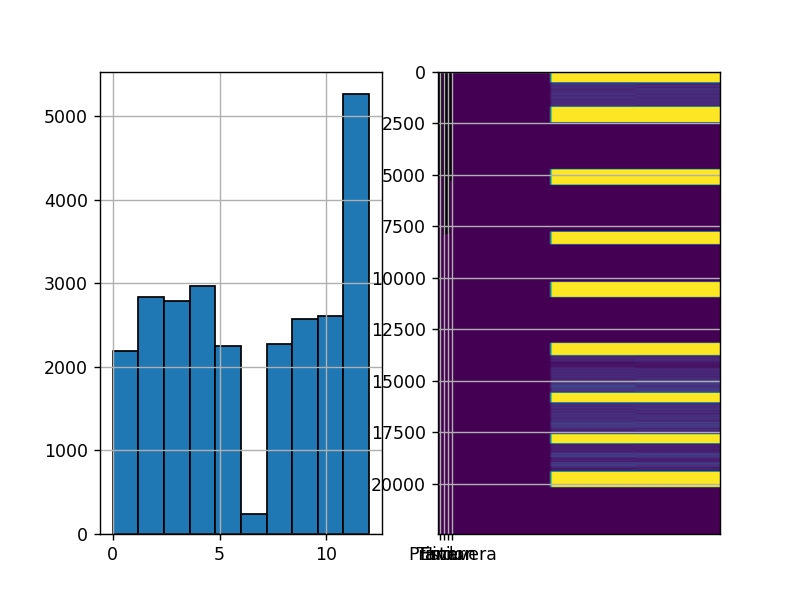

Count Values de date amb Mesos: 
 4     2969
2     2834
3     2785
11    2739
10    2608
9     2575
12    2524
8     2276
5     2245
1     2183
7      218
6       23
Name: date, dtype: int64
Count Values de date amb èpoques de l'any: 
 Tardor       7871
Hivern       7802
Primavera    5237
Estiu        5069
Name: date, dtype: int64


In [26]:
if showPlot:
    fig, axes = plt.subplots(1, 2)

    dateMesos.hist(ax=axes[0],range=[0,12],  edgecolor = "black")
    CopiaMatch['date'] = CopiaMatch.apply(epocaDeLAny, axis=1)
    CopiaMatch.date.hist(ax=axes[1], edgecolor = "black")
    showPlot = False
    plt.show()
    print(CBLUES +"Count Values de date amb Mesos: \n" + CEND, dateMesos.value_counts())
    print(CBLUES +"Count Values de date amb èpoques de l'any: \n" + CEND, CopiaMatch['date'].value_counts())
else:
    print("Els grafs no es poden mostrar ja que s'han modificat les dades, torna a carregar la taula (Punt 1.2.1) o executa la taula anterior correctament.")

Mitjançant els dos histogrames anteriors, podrem verificar si el canvi de mes a època de l'any s'ha realitzat d'una manera correcta. Observem que hivern equival als tres primers mesos, per tant, sumem els valors del mes 1 (2000 aproximadament), el mes 2 (3000 aproximadament) i del tercer mes (3000 aproximadament). Això suma unes 8000 dades dins d'aquesta franja, la qual cosa es pot veure i verificar en l'histograma de la dreta, on l'hivern té unes 8000 dades.
He afegit uns prints (color blau subratllat) en el qual es poden veure els valors exactes de cada mes i cada època, on es pot confirmar d'una manera més científica la observació anterior.

El mateix passa amb tots els mesos i èpoques, la qual cosa ens confirma que s'ha realitzat correctament la categorització. Tot i que aquesta encara no ha acabat, doncs haurem d'assignar un valor de 0 a 3 a cada una de les èpoques. Això ho realitzarem a continuació. Per tal de fer-ho més clar i entenedor he preferit realitzar el pas intermig d'assignar una cadena de caràcters per tal d'indicar la època de l'any, tot i que a partir d'ara es representarà amb un valor.

In [27]:
categoricAInt(CopiaMatch)
print(CBLUES +"Count Values de date amb èpoques de l'any: \n" + CEND, CopiaMatch['date'].value_counts())

Count Values de date amb èpoques de l'any: 
 3    7871
1    7802
2    5237
0    5069
Name: date, dtype: int64


Per tal de recordar-ho després, anotem a què correspon cada valor assignat a la categorització de la ``date`` amb èpoques de l'any:
* **Estiu** --> [**0**]
* **Hivern** --> [**1**]
* **Primavera** --> [**2**]
* **Tardor** --> [**3**]

#### Conclusió del tractament de la taula Match:

Finalment, hem reduït els atributs de la taula Match. Inicialment contavem amb 115 columnes, mentre que ara només en tenim 29 amb un màxim d'un 13'31% de valors NaN.

Per a acabar amb el tractament d'aquesta taula doncs, haurem de tractar aquests valors.

Inicialment, per tal de simplificar una mica la feina, el que faré serà el·liminar les files amb valors NaN. En un futur, en cas de no rebre resultats satisfactòris, tindré la opció de tractar totes les dades amb valors Nan per tal de no perdre cap fila.

In [28]:
shapeAbans = CopiaMatch.shape[0]

# Línia de codi per eliminar les files amb valors NaN.
CopiaMatch = CopiaMatch.dropna(axis = 0).reset_index(drop=True)

# Observem quantes files hem perdut:
shapeDespres = CopiaMatch.shape[0]
print("Shape abans = ",shapeAbans , " i shape després = ", shapeDespres)

# Percentatge de files perdudes:
print("Percentatge de files perdudes després d'eliminar les files amb valors NaN: ", 100 - (100*shapeDespres/shapeAbans))

Shape abans =  25979  i shape després =  22432
Percentatge de files perdudes després d'eliminar les files amb valors NaN:  13.653335386273525


Finalment comprovem el percentatge de files perdudes. Hem perdut un 13'65% de les files, que recordem que inicialment eren ``25979`` dades. De moment no puc confirmar si aquesta pèrdua afectarà gaire al model, però comptant amb que hauré d'ajuntar múltiples taules per tal d'obtenir un dataframe amb el qual poder treballar, ho faré d'aquesta manera.

Tot i això, seguim comptant amb ``22432 dades``, les quals considero que són dades suficients com per entrenar un model.

In [29]:
CopiaMatch.dtypes

id                    int64
country_id            int64
league_id             int64
season                int32
stage                 int64
date                  int32
home_team_api_id      int64
away_team_api_id      int64
home_team_goal        int64
away_team_goal        int64
B365H               float64
B365D               float64
B365A               float64
BWH                 float64
BWD                 float64
BWA                 float64
IWH                 float64
IWD                 float64
IWA                 float64
LBH                 float64
LBD                 float64
LBA                 float64
WHH                 float64
WHD                 float64
WHA                 float64
VCH                 float64
VCD                 float64
VCA                 float64
dtype: object

Com a últim comentari d'aquesta taula, veiem en la comprovació final dels tipus de dades que conté cada atribut, que tots i cada un d'ells té un valor numèric, ja sigui real o enter.
Fins al moment doncs, hem acabat el tractament de dades de la taula Match.

### 1.2.2. Tractament de la taula TEAM

In [30]:
# Abans de fer res, realitzar una còpia de la taula per tal d'evitar 
# borrar o modificar la taula original per error.
CopiaTeam = datasetTeam.copy()
CopiaTeam.head()

id  team_api_id  team_fifa_api_id     team_long_name team_short_name
0   1         9987           673.000           KRC Genk             GEN
1   2         9993           675.000       Beerschot AC             BAC
2   3        10000         15005.000   SV Zulte-Waregem             ZUL
3   4         9994          2007.000   Sporting Lokeren             LOK
4   5         9984          1750.000  KSV Cercle Brugge             CEB

D'aquesta taula, ens interessa la columna ``team_api_id`` per tal de relacionar aquest equip amb el corresponent id de la taula de Match, i també l'atribut ``team_fifa_api_id`` per tal d'obtenir la id que podrem relacionar amb la taula Team Attributs.

Per tant, només ens quedarem amb aquestes dues columnes. Després, en aquesta mateixa taula hi afegirem els atributs de l'equip segons el ``team_fifa_api_id`` i finalment ho ajuntarem tot amb la taula Match gràcies al ``team_api_id``.

In [31]:
# Drop de les columnes NO necessàries
CopiaTeam = CopiaTeam.drop(labels = ['id','team_long_name','team_short_name'],axis = 1)
CopiaTeam.shape

(299, 2)

In [32]:
# Comprovació per verificar que el drop s'ha realitzat correctament.
CopiaTeam.head()

team_api_id  team_fifa_api_id
0         9987           673.000
1         9993           675.000
2        10000         15005.000
3         9994          2007.000
4         9984          1750.000

### 1.2.3. Tractament de la taula TEAM_ATTRIBUTES

Recordem de l'anàlisi anterior que no tenim casi cap valor NaN en aquesta taula, la qual cosa facilitarà una mica la feina. Només s'haurà de fer un drop de l'atribut ``buildUpPlayDribbling``, el qual té **969** dades Nan del total de **1458** de la taula. Tot i això, sí que tenim molts atributs de tipus object, els quals s'haurien de passar a valors enters per tal de poder treballar amb ells.
També traurem la columna de Id, ja que la seva informació és redundant, doncs l'atribut team_fifa_api_id compleix la mateixa funció.
Per últim, tractarem la data d'igual manera que ho hem fet amb la temporada (['season']) de la Taula Match, per obtenir l'any com un valor enter.

In [33]:
# Abans de fer res, realitzar una còpia de la taula per tal d'evitar 
# borrar o modificar la taula original per error.
CopiaTeamAttributes = datasetTeam_Attributes.copy()
CopiaTeamAttributes = CopiaTeamAttributes.drop(labels = ['id', 'buildUpPlayDribbling'], axis=1)
# Agafar només els primers 4 caràcters (Corresponents a YYYY i guardar-los en la mateixa columna)
CopiaTeamAttributes['date'] = CopiaTeamAttributes['date'].astype(str).str[0:4]
CopiaTeamAttributes['date'] = CopiaTeamAttributes['date'].astype(int)
CopiaTeamAttributes.head()
print(CopiaTeamAttributes.shape)
#print(CopiaTeamAttributes.isnull().sum())

(1458, 23)


In [34]:
# Tant aquesta cel·la com la següent serviran per comprovar que la funció per transformar 
# els atributs de tipus object, i per tant, categòric a valors de tipus int funciona correctament.
CopiaTeamAttributes['buildUpPlayDribblingClass'].unique()
# Podem veure que contem amb una columna amb atributs categòrics, en total tenim tres valors diferents.

array(['Little', 'Normal', 'Lots'], dtype=object)

In [35]:
# Cridem la funció per transformar tots els atributs d'aquesta taula
categoricAInt(CopiaTeamAttributes)
CopiaTeamAttributes['buildUpPlayDribblingClass'].unique()

# Comprovem que ara contem amb valors numèrics en comptes dels categòrics anteriors.

array([0, 2, 1])

In [36]:
CopiaTeamAttributes.head()

team_fifa_api_id  team_api_id  date  buildUpPlaySpeed  \
0               434         9930  2010                60   
1               434         9930  2014                52   
2               434         9930  2015                47   
3                77         8485  2010                70   
4                77         8485  2011                47   

   buildUpPlaySpeedClass  buildUpPlayDribblingClass  buildUpPlayPassing  \
0                      0                          0                  50   
1                      0                          2                  56   
2                      0                          2                  54   
3                      1                          0                  70   
4                      0                          0                  52   

   buildUpPlayPassingClass  buildUpPlayPositioningClass  \
0                        1                            1   
1                        1                            1   
2                        1                            1   
3                        0                            1   
4                        1                            1   

   chanceCreationPassing  chanceCreationPassingClass  chanceCreationCrossing  \
0                     60                           0                      65   
1                     54                           0                      63   
2                     54                           0                      63   
3                     70                           1                      70   
4                     53                           0                      48   

   chanceCreationCrossingClass  chanceCreationShooting  \
0                            2                      55   
1                            2                      64   
2                            2                      64   
3                            1                      70   
4                            2                      52   

   chanceCreationShootingClass  chanceCreationPositioningClass  \
0                            2                               1   
1                            2                               1   
2                            2                               1   
3                            1                               1   
4                            2                               1   

   defencePressure  defencePressureClass  defenceAggression  \
0               50                     2                 55   
1               47                     2                 44   
2               47                     2                 44   
3               60                     2                 70   
4               47                     2                 47   

   defenceAggressionClass  defenceTeamWidth  defenceTeamWidthClass  \
0                       2                45                      1   
1                       2                54                      1   
2                       2                54                      1   
3                       1                70                      2   
4                       2                52                      1   

   defenceDefenderLineClass  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0

In [37]:
CopiaTeamAttributes.dtypes

team_fifa_api_id                  int64
team_api_id                       int64
date                              int32
buildUpPlaySpeed                  int64
buildUpPlaySpeedClass             int32
buildUpPlayDribblingClass         int32
buildUpPlayPassing                int64
buildUpPlayPassingClass           int32
buildUpPlayPositioningClass       int32
chanceCreationPassing             int64
chanceCreationPassingClass        int32
chanceCreationCrossing            int64
chanceCreationCrossingClass       int32
chanceCreationShooting            int64
chanceCreationShootingClass       int32
chanceCreationPositioningClass    int32
defencePressure                   int64
defencePressureClass              int32
defenceAggression                 int64
defenceAggressionClass            int32
defenceTeamWidth                  int64
defenceTeamWidthClass             int32
defenceDefenderLineClass          int32
dtype: object

D'igual manera que hem fet amb la taula anterior, fem una última comprovació per tal de verificar que totes les dades siguin de típus numèric (ja siguin reals o enters).

## 1.3. Ajuntar taules en un primer Dataframe i estudi de correlacions:

A continuació intentarem ajuntar les tres taules anteriors per tal de crear un Dataframe amb el que podrem entrenar el primer model. Per a això, inicialment ajuntarem la taula Teams amb Team_Attributes, i un cop aquestes estiguin juntes, les posarem a la taula Match.

In [38]:

# Primer creem la taula que ajuntarà Team amb Team_Attributes
dfTeam = CopiaTeamAttributes
dfMatch = CopiaMatch
#df = pd.merge(dfTeam, CopiaTeam, on="team_fifa_api_id")
#Crear els atributs per home i away team. 
df_home = dfTeam
df_away = dfTeam
# Afegim els prefixs home i away a les columnes per tal de diferenciar els dos equips en un partit.
df_home = df_home.add_prefix('home_')
df_away = df_away.add_prefix('away_')

# Modifiquem el nom de l'atribut XX_date per season, doncs l'utilitzarem per ajuntar les taules amb la season corresponent de Match.
df_home.rename(columns = {'home_date':'season'}, inplace = True)
df_away.rename(columns = {'away_date':'season'}, inplace = True)

print("CopiaMatch shape = ", CopiaMatch.shape)
print("dfMatch shape = ", dfMatch.shape)
#df_away.head()

CopiaMatch shape =  (22432, 28)
dfMatch shape =  (22432, 28)


Després de començar a mirar com ajuntar les taules que poden aportar més informació, m'he donat compte que la taula Team realment no cal utilitzar-la, doncs només la utilitzavem per enllaçar la taula Match amb la de Team_Attributes, però aquesta última conté també el team_api_id, necessari per relacionar-la amb la taula Match.

Tot i això, no modifico la cel·la anterior per tal de deixar el procés d'anàl·lisi intacte.

In [39]:
# Creem el primer DataFrame afegint els atributs del home team.
new_df = pd.merge(CopiaMatch, df_home,  how='left', left_on=['home_team_api_id', 'season'], right_on=['home_team_api_id', 'season'])

In [40]:
# Creem el DataFrame Final afegint els atributs del away team.
df_Final = pd.merge(new_df, df_away,  how='left', left_on=['away_team_api_id', 'season'], right_on=['away_team_api_id', 'season'])

Després de barallar-me bastant, finalment tenim un dataframe que conté els atributs de la taula Match amb els atributs de l'equip visitant i local de la data en la qual es va disputar el partit (temporada).
A continuació farem una comprovació de les mides de les taules i dataframes que hem anat veient i comprovarem els valors NaN.

In [41]:
print("Shape of CopiaMatch = ", CopiaMatch.shape)
print("Shape home_df = ", df_home.shape)
print("Shape new_df = ", new_df.shape)
print("Shape of df_Final = ", df_Final.shape)
df_Final.isna().sum()*100/df_Final.shape[0]

Shape of CopiaMatch =  (22432, 28)
Shape home_df =  (1458, 23)
Shape new_df =  (22432, 49)
Shape of df_Final =  (22432, 70)


id                                     0.000
country_id                             0.000
league_id                              0.000
season                                 0.000
stage                                  0.000
date                                   0.000
home_team_api_id                       0.000
away_team_api_id                       0.000
home_team_goal                         0.000
away_team_goal                         0.000
B365H                                  0.000
B365D                                  0.000
B365A                                  0.000
BWH                                    0.000
BWD                                    0.000
BWA                                    0.000
IWH                                    0.000
IWD                                    0.000
IWA                                    0.000
LBH                                    0.000
LBD                                    0.000
LBA                                    0.000
WHH       

Aquests valors NaN en els nous atributs afegits, poden ser deguts a que un partit no ha coincidit amb atributs d'any de temporada i id d'equip alhora. Pot haver estat causat per la pròpia base de dades al faltar algun registre d'atributs d'equip d'algun any en concret per a cert equip o per la modificació que he fet a la temporada (de 2008/2009 a només 2008) i que en el cas de Team_Attributes teniem una data. Com que una temporada no és equivalent a un any natural, això pot haver provocat problemes.

Per a aquest moment, després d'haver (per fi) aconseguit ajuntar les taules, eliminarem les files amb valors NaN, i posteriorment veurem la grandària de la base de dades restant.

**Observem quina correlació tenen aquests valors NaN entre ells.** Inicialment sembla que els valors NaN tindràn molta correlació entre ells, doncs els percentatges de valors NaN són iguals per a tots els valors d'un equip i entre els dos equips són quasi idèntics. Tot i això anem a comprovar-ho gràficament:

In [42]:
plt.imshow(df_Final.isnull(),aspect="auto")
plt.show()

Efectivament, es confirma la hipòtesi inicial. Comprovem que els valors NaN tenien molta correlació entre ells.

In [43]:
# Línia de codi per eliminar les files amb valors NaN.
df_Final = df_Final.dropna(axis = 0).reset_index(drop=True)

In [44]:
df_Final.shape

(15393, 70)

Hem perdut moltes dades, però són suficients com per proseguir.

Intentem visualitzar-les en un mapa de calor:

<IPython.core.display.Javascript object>


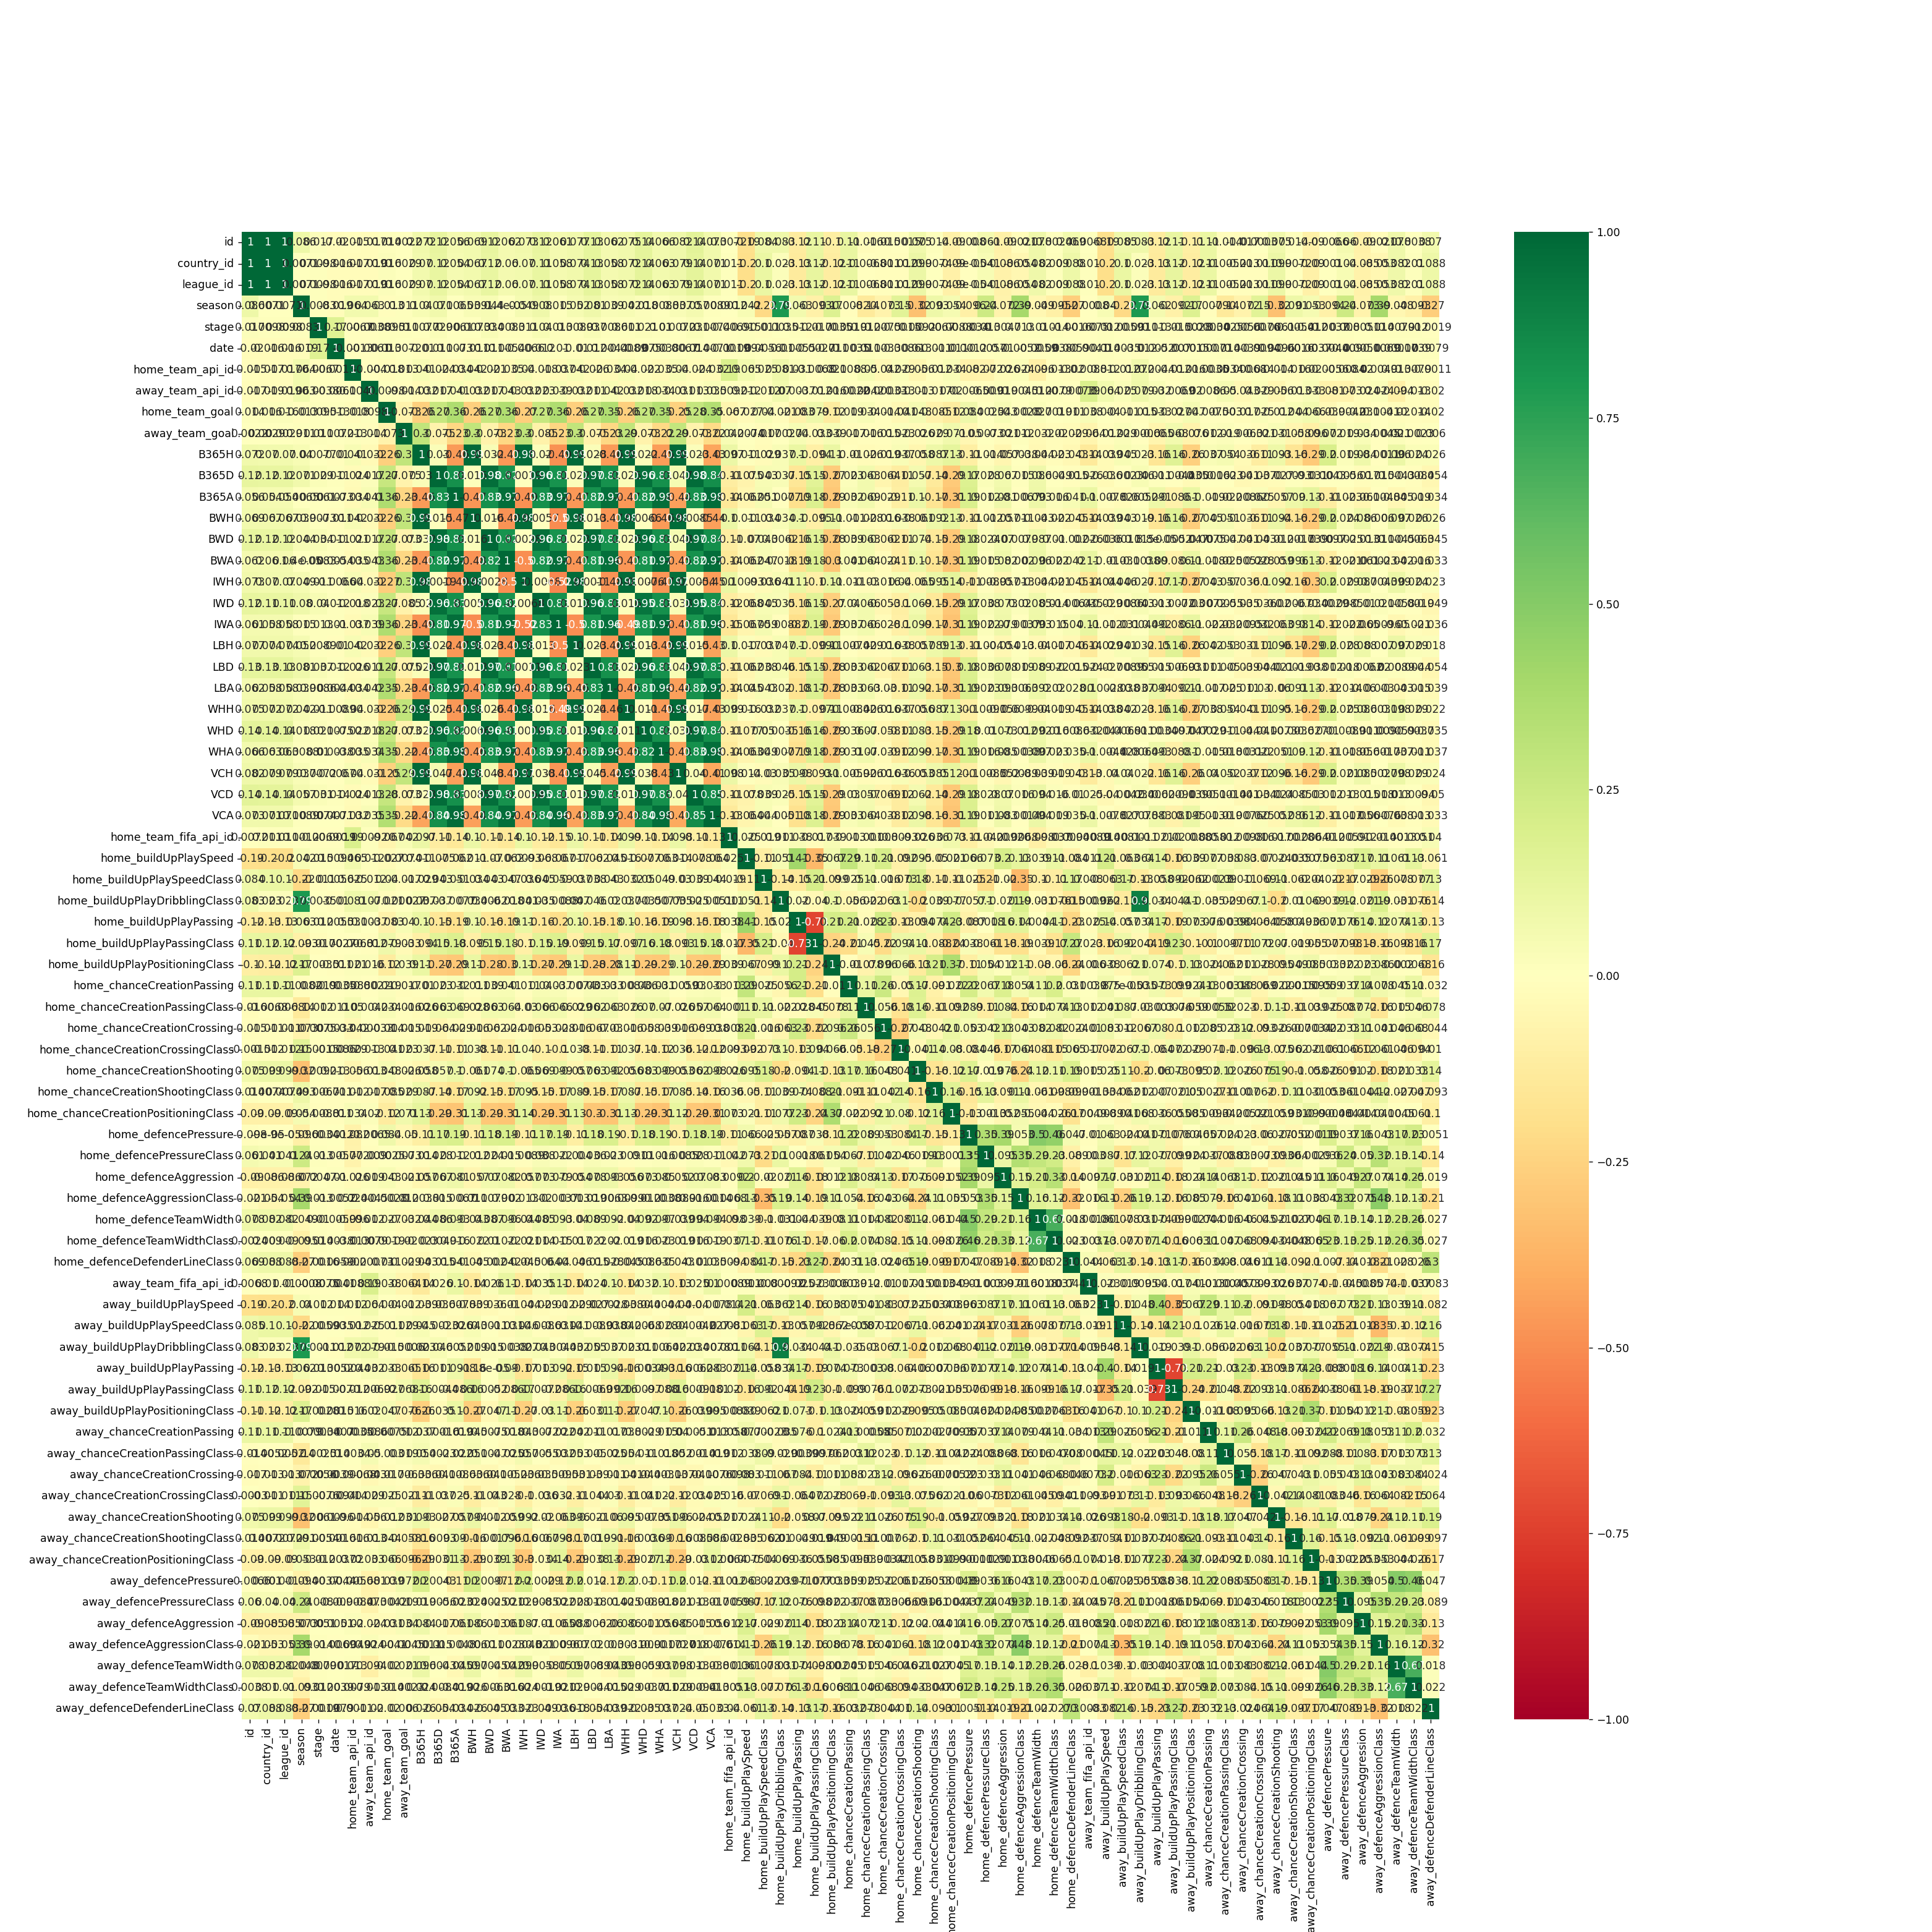

In [45]:
df_Final_corr = df_Final.corr()
plt.figure(figsize=(25,25))
ax = sns.heatmap(df_Final_corr,cmap='RdYlGn',annot=True,center=0,vmin=-1.0,vmax=1.0)
plt.show()

No es poden observar correctament els valors, el que sí que veiem és que hi ha certs atributs amb correlacions prou altes (tant positives com negatives).

**A continuació, crearem un nou dataframe, el qual serà un subset amb les correlacions majors del 60% del dataframe original:**

Abans de crear el nou dataframe, afegirem tres nous atributs que poden ser els nostres objectius a predir. Degut a que tenim el número de gols de cada equip, però ens interessa més saber qui ha guanyat, i així ho tenim en les diverses columnes. Potser també seria interessant ajuntar-ho tot en una columna en la qual fos 0 per guanya el local, 1 per empat i 2 per guanya el visitant.

In [46]:
draw_filter= df_Final['home_team_goal']==df_Final['away_team_goal']
home_win_filter= df_Final['home_team_goal']>df_Final['away_team_goal']
away_win_filter= df_Final['home_team_goal']<df_Final['away_team_goal']

In [47]:
df_Final['draw']=draw_filter
df_Final['home_win']=home_win_filter
df_Final['away_win']=away_win_filter

In [48]:
df_Final.head()

id  country_id  league_id  season  stage  date  home_team_api_id  \
0  518           1          1    2010      1     0              8571   
1  519           1          1    2010      1     0              8203   
2  520           1          1    2010      1     0             10001   
3  522           1          1    2010      1     0              9985   
4  523           1          1    2010      1     0              9984   

   away_team_api_id  home_team_goal  away_team_goal  B365H  B365D  B365A  \
0              8342               1               0  3.750  3.300  1.910   
1              9994               2               0  1.910  3.300  3.800   
2              9991               0               1  2.900  3.200  2.300   
3             10000               1               1  1.730  3.600  4.750   
4              9986               1               1  1.800  3.500  4.000   

    BWH   BWD   BWA   IWH   IWD   IWA   LBH   LBD   LBA   WHH   WHD   WHA  \
0 3.750 3.400 1.870 3.300 3.300 1.900 3.200 3.200 2.000 3.500 3.250 2.000   
1 1.880 3.500 3.500 1.750 3.300 3.900 1.800 3.300 3.750 2.000 3.250 3.500   
2 3.200 3.200 2.100 2.800 3.100 2.200 3.000 3.200 2.100 3.000 3.300 2.200   
3 1.570 3.700 5.250 1.700 3.300 4.000 1.730 3.400 4.000 1.700 3.500 4.500   
4 1.800 3.500 3.900 1.750 3.300 3.800 1.730 3.400 4.000 1.750 3.400 4.330   

    VCH   VCD   VCA  home_team_fifa_api_id  home_buildUpPlaySpeed  \
0 3.600 3.300 1.830             100081.000                 50.000   
1 1.850 3.200 3.600             110724.000                 65.000   
2 2.880 3.120 2.200                681.000                 45.000   
3 1.670 3.400 4.600                232.000                 53.000   
4 1.830 3.300 3.800               1750.000                 45.000   

   home_buildUpPlaySpeedClass  home_buildUpPlayDribblingClass  \
0                       0.000                           0.000   
1                       0.000                           0.000   
2                       0.000                           0.000   
3                       0.000                           0.000   
4                       0.000                           0.000   

   home_buildUpPlayPassing  home_buildUpPlayPassingClass  \
0                   60.000                         1.000   
1                   60.000                         1.000   
2                   60.000                         1.000   
3                   40.000                         1.000   
4                   35.000                         1.000   

   home_buildUpPlayPositioningClass  home_chanceCreationPassing  \
0                             1.000                      50.000   
1                             1.000                      50.000   
2                             1.000                      40.000   
3                             1.000                      55.000   
4                             1.000                      70.000   

   home_chanceCreationPassingClass  home_chanceCreationCrossing  \
0                            0.000                       50.000   
1                            0.000                       40.000   
2                            0.000                       45.000   
3                            0.000                       55.000   
4                            1.000                       45.000   

   home_chanceCreationCrossingClass  home_chanceCreationShooting  \
0                             2.000                       50.000   
1                             2.000                       50.000   
2                             2.000                       55.000   
3                             2.000                       65.000   
4                             2.000                       55.000   

   home_chanceCreationShootingClass  home_chanceCreationPositioningClass  \
0                             2.000                                1.000   
1                             2.000                                1.000   
2                             2.000      

In [49]:
#df_Final['result'] = df_Final.apply(resultatPartit, axis=1)
def resultatPartit(row):
    if row['home_win'] == True and row['draw'] == False and row['away_win'] == False:
        val = 0
    elif row['home_win'] == False and row['draw'] == True and row['away_win'] == False:
        val = 1
    elif row['home_win'] == False and row['draw'] == False and row['away_win'] == True:
        val = 2
    else:
        val = None
    return val
df_Final['result'] = df_Final.apply(resultatPartit, axis=1)
df_Final.head()

id  country_id  league_id  season  stage  date  home_team_api_id  \
0  518           1          1    2010      1     0              8571   
1  519           1          1    2010      1     0              8203   
2  520           1          1    2010      1     0             10001   
3  522           1          1    2010      1     0              9985   
4  523           1          1    2010      1     0              9984   

   away_team_api_id  home_team_goal  away_team_goal  B365H  B365D  B365A  \
0              8342               1               0  3.750  3.300  1.910   
1              9994               2               0  1.910  3.300  3.800   
2              9991               0               1  2.900  3.200  2.300   
3             10000               1               1  1.730  3.600  4.750   
4              9986               1               1  1.800  3.500  4.000   

    BWH   BWD   BWA   IWH   IWD   IWA   LBH   LBD   LBA   WHH   WHD   WHA  \
0 3.750 3.400 1.870 3.300 3.300 1.900 3.200 3.200 2.000 3.500 3.250 2.000   
1 1.880 3.500 3.500 1.750 3.300 3.900 1.800 3.300 3.750 2.000 3.250 3.500   
2 3.200 3.200 2.100 2.800 3.100 2.200 3.000 3.200 2.100 3.000 3.300 2.200   
3 1.570 3.700 5.250 1.700 3.300 4.000 1.730 3.400 4.000 1.700 3.500 4.500   
4 1.800 3.500 3.900 1.750 3.300 3.800 1.730 3.400 4.000 1.750 3.400 4.330   

    VCH   VCD   VCA  home_team_fifa_api_id  home_buildUpPlaySpeed  \
0 3.600 3.300 1.830             100081.000                 50.000   
1 1.850 3.200 3.600             110724.000                 65.000   
2 2.880 3.120 2.200                681.000                 45.000   
3 1.670 3.400 4.600                232.000                 53.000   
4 1.830 3.300 3.800               1750.000                 45.000   

   home_buildUpPlaySpeedClass  home_buildUpPlayDribblingClass  \
0                       0.000                           0.000   
1                       0.000                           0.000   
2                       0.000                           0.000   
3                       0.000                           0.000   
4                       0.000                           0.000   

   home_buildUpPlayPassing  home_buildUpPlayPassingClass  \
0                   60.000                         1.000   
1                   60.000                         1.000   
2                   60.000                         1.000   
3                   40.000                         1.000   
4                   35.000                         1.000   

   home_buildUpPlayPositioningClass  home_chanceCreationPassing  \
0                             1.000                      50.000   
1                             1.000                      50.000   
2                             1.000                      40.000   
3                             1.000                      55.000   
4                             1.000                      70.000   

   home_chanceCreationPassingClass  home_chanceCreationCrossing  \
0                            0.000                       50.000   
1                            0.000                       40.000   
2                            0.000                       45.000   
3                            0.000                       55.000   
4                            1.000                       45.000   

   home_chanceCreationCrossingClass  home_chanceCreationShooting  \
0                             2.000                       50.000   
1                             2.000                       50.000   
2                             2.000                       55.000   
3                             2.000                       65.000   
4                             2.000                       55.000   

   home_chanceCreationShootingClass  home_chanceCreationPositioningClass  \
0                             2.000                                1.000   
1                             2.000                                1.000   
2                             2.000      

In [50]:
print(CBLUES +"Count Values de result: \n" + CEND, df_Final['result'].value_counts())

Count Values de result: 
 0    7031
2    4485
1    3877
Name: result, dtype: int64


Observem que el resultat que es repeteix més és la victòria de l'equip local.
**Evidentment, si ens volem quedar amb l'atribut result, abans d'utilitzar-la haurem de fer un drop de les tres anteriors, i si ens interessen les tres anteriors, el drop haurà de ser del atribut result, doncs són linealment dependents.**

In [51]:
# Amb aquesta línia de codi, si viatgem als extrems del print, veiem les correlacions més altes. A dalt les positives
# i a baix, les negatives.
df_Final.corr().unstack().sort_values().drop_duplicates()

home_win                             result                                -0.901
home_buildUpPlayPassing              home_buildUpPlayPassingClass          -0.727
away_buildUpPlayPassingClass         away_buildUpPlayPassing               -0.727
home_team_goal                       result                                -0.625
away_win                             home_win                              -0.588
draw                                 home_win                              -0.532
IWA                                  IWH                                   -0.520
away_team_goal                       home_win                              -0.504
IWA                                  BWH                                   -0.502
LBH                                  IWA                                   -0.496
IWH                                  BWA                                   -0.495
WHH                                  IWA                                   -0.494
IWA             

In [52]:
import numpy as np

# Create correlation matrix
corr_matrix = df_Final.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
df_FinalHighCorrelation = [column for column in upper.columns if any(upper[column] > 0.60)]

In [53]:
len(df_FinalHighCorrelation)
dfSimpl = df_Final[df_FinalHighCorrelation]
dfSimpl.head()

country_id  league_id  B365A   BWH   BWD   BWA   IWH   IWD   IWA   LBH  \
0           1          1  1.910 3.750 3.400 1.870 3.300 3.300 1.900 3.200   
1           1          1  3.800 1.880 3.500 3.500 1.750 3.300 3.900 1.800   
2           1          1  2.300 3.200 3.200 2.100 2.800 3.100 2.200 3.000   
3           1          1  4.750 1.570 3.700 5.250 1.700 3.300 4.000 1.730   
4           1          1  4.000 1.800 3.500 3.900 1.750 3.300 3.800 1.730   

    LBD   LBA   WHH   WHD   WHA   VCH   VCD   VCA  \
0 3.200 2.000 3.500 3.250 2.000 3.600 3.300 1.830   
1 3.300 3.750 2.000 3.250 3.500 1.850 3.200 3.600   
2 3.200 2.100 3.000 3.300 2.200 2.880 3.120 2.200   
3 3.400 4.000 1.700 3.500 4.500 1.670 3.400 4.600   
4 3.400 4.000 1.750 3.400 4.330 1.830 3.300 3.800   

   home_buildUpPlayDribblingClass  home_buildUpPlayPassingClass  \
0                           0.000                         1.000   
1                           0.000                         1.000   
2                           0.000                         1.000   
3                           0.000                         1.000   
4                           0.000                         1.000   

   home_defenceTeamWidthClass  away_buildUpPlayDribblingClass  \
0                       1.000                           0.000   
1                       1.000                           0.000   
2                       2.000                           0.000   
3                       1.000                           0.000   
4                       2.000                           0.000   

   away_buildUpPlayPassingClass  away_defenceTeamWidthClass  home_win  \
0                         1.000                       2.000      True   
1                         1.000                       2.000      True   
2                         1.000                       1.000     False   
3                         1.000                       2.000     False   
4                         1.000                       2.000     False   

   away_win  result  
0     False       0  
1     False       0  
2      True       2  
3     False       1  
4     False       1

In [54]:
dfSimpl.shape

(15393, 27)

# 2. Crear i entrenar el model

Primerament haurem de decidir què volem predir. Inicialment, decideixo predir la columna ``result``. Per tant, com bé hem comentat anteriorment, fem un drop de les creades (home_win i away_win, doncs draw no ha superat el filtre de correlacions.)

In [55]:
dfSimpl = dfSimpl.drop('home_win', axis=1)
dfSimpl = dfSimpl.drop('away_win', axis=1)
dfSimpl.head()

country_id  league_id  B365A   BWH   BWD   BWA   IWH   IWD   IWA   LBH  \
0           1          1  1.910 3.750 3.400 1.870 3.300 3.300 1.900 3.200   
1           1          1  3.800 1.880 3.500 3.500 1.750 3.300 3.900 1.800   
2           1          1  2.300 3.200 3.200 2.100 2.800 3.100 2.200 3.000   
3           1          1  4.750 1.570 3.700 5.250 1.700 3.300 4.000 1.730   
4           1          1  4.000 1.800 3.500 3.900 1.750 3.300 3.800 1.730   

    LBD   LBA   WHH   WHD   WHA   VCH   VCD   VCA  \
0 3.200 2.000 3.500 3.250 2.000 3.600 3.300 1.830   
1 3.300 3.750 2.000 3.250 3.500 1.850 3.200 3.600   
2 3.200 2.100 3.000 3.300 2.200 2.880 3.120 2.200   
3 3.400 4.000 1.700 3.500 4.500 1.670 3.400 4.600   
4 3.400 4.000 1.750 3.400 4.330 1.830 3.300 3.800   

   home_buildUpPlayDribblingClass  home_buildUpPlayPassingClass  \
0                           0.000                         1.000   
1                           0.000                         1.000   
2                           0.000                         1.000   
3                           0.000                         1.000   
4                           0.000                         1.000   

   home_defenceTeamWidthClass  away_buildUpPlayDribblingClass  \
0                       1.000                           0.000   
1                       1.000                           0.000   
2                       2.000                           0.000   
3                       1.000                           0.000   
4                       2.000                           0.000   

   away_buildUpPlayPassingClass  away_defenceTeamWidthClass  result  
0                         1.000                       2.000       0  
1                         1.000                       2.000       0  
2                         1.000                       1.000       2  
3                         1.000                       2.000       1  
4                         1.000                       2.000       1

In [56]:
# dfSimpl és el nostre dataframe simplificat, amb les millors correlacions i per tant, el que utilitzarem.

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Y = dfSimpl['result'].copy()
X = dfSimpl.drop('result', axis=1).copy()

# Estandaritzem les nostres dades
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Dividir entre train i test. Escullo fer una partició del 80% d'entrenament doncs en el procés de crear la base de dades
# conjunta s'han anat perdent dades i no contem amb una gran quantitat de dades com per tenir mesures similars de train i test.
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=100)
print(X_train.shape)
print(X_test.shape)

(12314, 24)
(3079, 24)


### Model Random Forest:

Per a la implementació del model de classificació Random Forest, inicialment l'executaré amb uns paràmetres d'entrada determinats i veurem quin accuracy aconsegueix. Posteriorment, intentarem obtenir els millors paràmetres per tal de maximitzar l'accuracy, i un cop els obtinguem, tornarem a executar el model amb aquests nous paràmetres per verificar si hem trobat una millor configuració o no.

In [57]:
# Fer els imports necessaris per al model Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# Crear el classificador
classif=RandomForestClassifier(n_estimators=100, bootstrap=False, min_samples_split=400, min_samples_leaf=100, n_jobs=-1, random_state=42)

# Entrenar el model...
classif.fit(X_train,y_train)
# Fer el test
y_pred=classif.predict(X_test)

# Mostrar la accuracy del nostre model Random Forest.
print("Accuracy del Random Forest amb les dades introduïdes: {:.4f}.".format(accuracy_score(y_test, y_pred)))                     
                            # Limitar a 4 decimals l'accuracy.

Accuracy del Random Forest amb les dades introduïdes: 0.5239.


In [58]:
# Random Forest | Optimización
from sklearn.model_selection import GridSearchCV
# Creamos la lista de parámetros que le podemos introducir introduciendo diferentes valores
#param_grid = {
#    'n_estimators': [20, 50, 100, 150, 200, 500],
#    'max_depth': [8, 10, 12, 14, 16, 32],
#    'min_samples_split': [50, 75, 100, 200, 300, 400],
#    'min_samples_leaf': [15, 25, 50, 75, 100, 150],
#    'bootstrap': [False]
#}

param_grid = {
    'n_estimators': [100, 150, 200, 500],
    'max_depth': [12, 14, 16, 32],
    'min_samples_split': [100, 200, 300, 400],
    'min_samples_leaf': [50, 75, 100, 150],
    'bootstrap': [False]
}

# Inicializamos el grid search con los parámetros establecidos
grid_search = GridSearchCV(cv=3, estimator = classif, param_grid = param_grid, scoring='balanced_accuracy', n_jobs = -1,verbose = 5)

# Entrenar el model...
grid_search.fit(X_test, y_test)

# Print del accuracy òptim amb la configuració d'hyperparametres corresponent:
print('Podem arribar a obtenir el següent accuracy: ',grid_search.best_score_,'si utilitzem els següents paràmetres: ',grid_search.best_params_)

Fitting 3 folds for each of 256 candidates, totalling 768 fits
Podemos obtener una accuracy de 0.42755798740073203 usando {'bootstrap': False, 'max_depth': 12, 'min_samples_leaf': 75, 'min_samples_split': 100, 'n_estimators': 500}


In [60]:
# Model Random Forest amb la nova configuració de paràmetres:

# Crear el classificador
X = dfSimpl.drop('result', axis=1)
classif=RandomForestClassifier(**grid_search.best_params_, n_jobs=-1, random_state=42)

# Entrenar el model... i Test
classif.fit(X_train, y_train)
y_train_pred= classif.predict(X_train)
y_test_pred= classif.predict(X_test)

# Estudiar l'accuracy del nostre Random Forest
train_accuracy, test_accuracy = accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))
print(f'Accuracy del Test {test_accuracy:.1%}')
print(f'Accuracy del Train {train_accuracy:.1%}')

# Visualització dels atributs més importants
feature_imp = pd.Series(classif.feature_importances_,index=X.columns).sort_values(ascending=False)
print("\nAtributos més importantes del nostre conjunt de dades:\n", feature_imp.sort_values(ascending=False)[:10])

              precision    recall  f1-score   support

           0       0.56      0.82      0.66      1447
           1       0.35      0.02      0.04       768
           2       0.46      0.49      0.47       864

    accuracy                           0.53      3079
   macro avg       0.46      0.44      0.39      3079
weighted avg       0.48      0.53      0.45      3079

Accuracy del Test 52.5%
Accuracy del Train 54.6%

Atributos més importantes del nostre conjunt de dades:
 BWA     0.127
VCH     0.119
BWH     0.108
VCA     0.096
WHA     0.082
LBA     0.072
B365A   0.064
WHH     0.054
IWA     0.045
IWH     0.044
dtype: float64


# Conclusió:

Sincerament, durant la realització d'aquesta pràctica, no he pogut dedicar gaire temps per a provar models, doncs preparar les dades m'ha consumit molt més temps del que esperava.
Tot i això, m'ha servit molt per a entendre les dades, doncs mai havia tractat amb un dataframe que fos una base de dades real amb diferents taules relacionades.

Al final crec que hi ha hagut un tractament de dades prou decent, doncs s'ha pogut ajuntar en una mateixa taula (dataframe) cada partit amb els equips visitants i locals i els seus atributs. A part de la creació d'alguns atributs extres com pot ser l'equip guanyador.

En la primera execució del Model Random Forest, s'ha obtingut un accuracy del 52'39%, la qual cosa ens indica que el model no és gens espectacular, però el recall és del 82%, per tant, el model no és dolent del tot.

Els atributs més importants són les prediccions de les diferents cases d'apostes, la qual cosa té sentit, doncs es guanyen la vida d'això, per tant, les seves prediccions són les més provables a succeïr, i per tant, els millor atributs.